In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
class AlgorithmsDS:
    """Class with algorithms from GB data analysis algorithms."""

    def __init__(self, n_features, data, target):
        """Constructor."""

        self.weights = np.zeros(n_features).reshape(n_features, 1)
        self.data = data
        self.target = target.reshape(target.shape[0], 1)
        self.errors = []
        self.w_list = [self.weights.copy()]

    def gradient_descent(self, eta=1e-02, max_iter=1e04, min_weight_dist=1e-08):
        """Gradient descent algorithm."""

        iter_num = 0
        weight_dist = np.inf

        while weight_dist > min_weight_dist and iter_num < max_iter:
            target_pred = np.dot(self.data, self.weights)
            
            err = self.calc_mse(self.target, target_pred)
            
            new_weights = self.weights - 2 * eta * (self.data.T @ (target_pred - self.target)) / self.target.shape[0]
            
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights

        self.w_list = np.array(self.w_list)

    def calc_mse(self, target, target_pred):
        """Mean squared error calculation."""

        err = np.mean((target - target_pred) ** 2)

        return err
    
    def stochastic_gradient_descent(self, eta=1e-04, max_iter=1e05, min_weight_dist=1e-08):
        """Stochastic gradient descent algorithm."""
        
        self.standartization()
        
        iter_num = 0
        weight_dist = np.inf
        np.random.seed(1234)
        
        while weight_dist > min_weight_dist and iter_num < max_iter:
            train_ind = np.random.randint(self.data.shape[0])
            
            target_pred = np.dot(self.data[train_ind], self.weights)

            new_weights = self.weights - 2 * eta * np.dot(self.data[train_ind].T.reshape(self.data.shape[1], 1),
                          (target_pred - self.target[train_ind]).reshape(1, 1)) / self.data.shape[1]
            err = self.calc_mse(self.target, self.data @ new_weights)

            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights

        self.w_list = np.array(self.w_list)
        
    def standartization(self):
        """Z-score data Normalization algorithm."""
        
        means = np.mean(self.data, axis=0)
        stds = np.std(self.data, axis=0)

        for i in range(self.data.shape[0]):
            for j in range(self.data.shape[1]):
                self.data[i][j] = (self.data[i][j] - means[j]) / stds[j]


* 1) Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
data, target= datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = False, random_state = 2)

In [4]:
gdc_obj = AlgorithmsDS(2, data, target)
gdc_obj.gradient_descent()

In [5]:
sgdc_obj = AlgorithmsDS(2, data, target)
sgdc_obj.stochastic_gradient_descent()

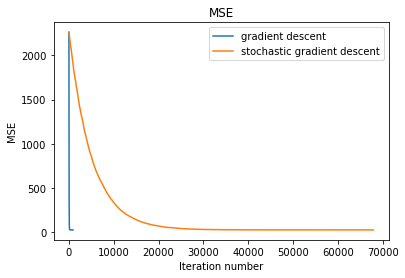

In [7]:
plt.plot(range(len(gdc_obj.errors)), gdc_obj.errors, label='gradient descent')
plt.plot(range(len(sgdc_obj.errors)), sgdc_obj.errors, label='stochastic gradient descent')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()